In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    r"C:\Users\nt397\Downloads\stores_sales_forecasting.csv",
    encoding='latin-1' 
)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID','Customer Name','Postal Code'], axis=1, inplace=True)

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     2121 non-null   datetime64[ns]
 1   Ship Date      2121 non-null   datetime64[ns]
 2   Ship Mode      2121 non-null   object        
 3   Segment        2121 non-null   object        
 4   Country        2121 non-null   object        
 5   City           2121 non-null   object        
 6   State          2121 non-null   object        
 7   Region         2121 non-null   object        
 8   Category       2121 non-null   object        
 9   Sub-Category   2121 non-null   object        
 10  Product Name   2121 non-null   object        
 11  Sales          2121 non-null   float64       
 12  Quantity       2121 non-null   int64         
 13  Discount       2121 non-null   float64       
 14  Profit         2121 non-null   float64       
 15  Shipping_Days  2121 n

In [7]:
df.describe(include=['int', 'float64'])

,Sales,Quantity,Discount,Profit,Shipping_Days
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327,3.917020
std,503.179145,2.251620,0.181547,136.049246,1.755234
min,1.892000,1.000000,0.000000,-1862.312400,0.000000
25%,47.040000,2.000000,0.000000,-12.849000,3.000000
50%,182.220000,3.000000,0.200000,7.774800,4.000000
75%,435.168000,5.000000,0.300000,33.726600,5.000000
max,4416.174000,14.000000,0.700000,1013.127000,7.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     2121 non-null   datetime64[ns]
 1   Ship Date      2121 non-null   datetime64[ns]
 2   Ship Mode      2121 non-null   object        
 3   Segment        2121 non-null   object        
 4   Country        2121 non-null   object        
 5   City           2121 non-null   object        
 6   State          2121 non-null   object        
 7   Region         2121 non-null   object        
 8   Category       2121 non-null   object        
 9   Sub-Category   2121 non-null   object        
 10  Product Name   2121 non-null   object        
 11  Sales          2121 non-null   float64       
 12  Quantity       2121 non-null   int64         
 13  Discount       2121 non-null   float64       
 14  Profit         2121 non-null   float64       
 15  Shipping_Days  2121 n

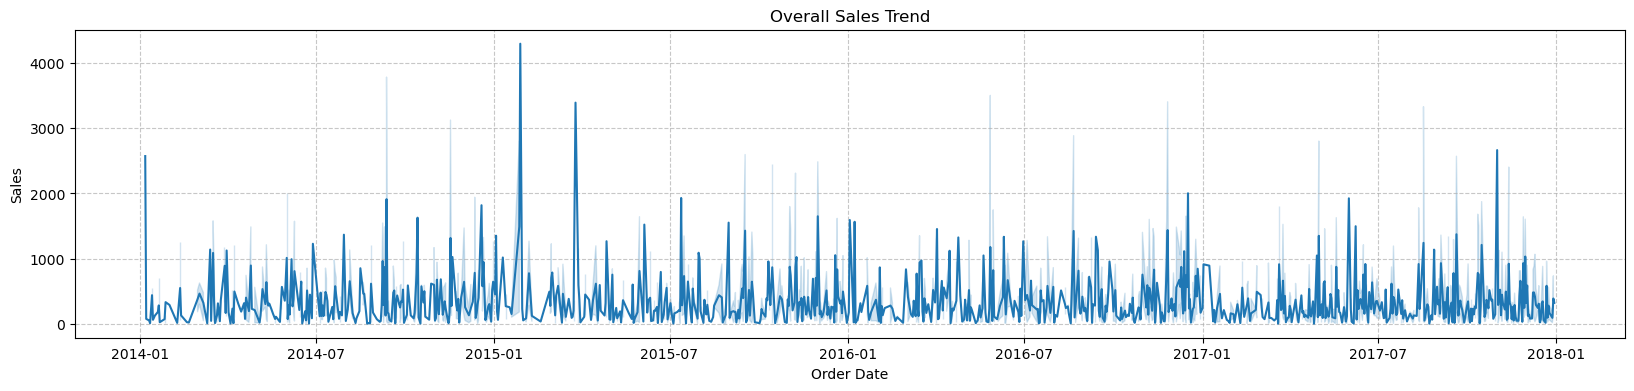

In [9]:
plt.figure(figsize=(20, 4))

sns.lineplot(data=df, x='Order Date', y='Sales')

plt.title('Overall Sales Trend')
plt.xlabel('Order Date')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The Overall Sales Trend shows a high degree of volatility and seasonality, with sales spikes occurring frequently, particularly around the beginning of 
2015, while the long-term average remains relatively constant between 2014 and 2018.

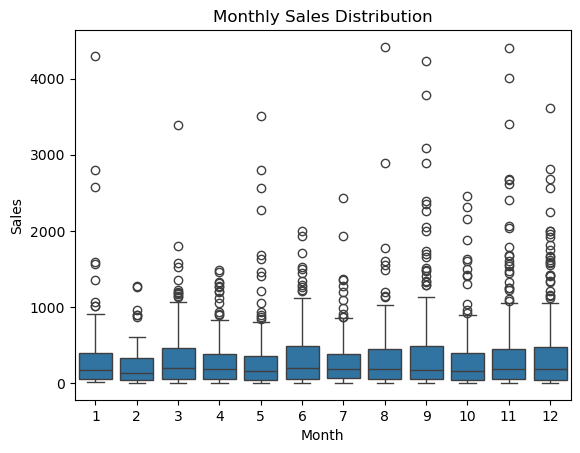

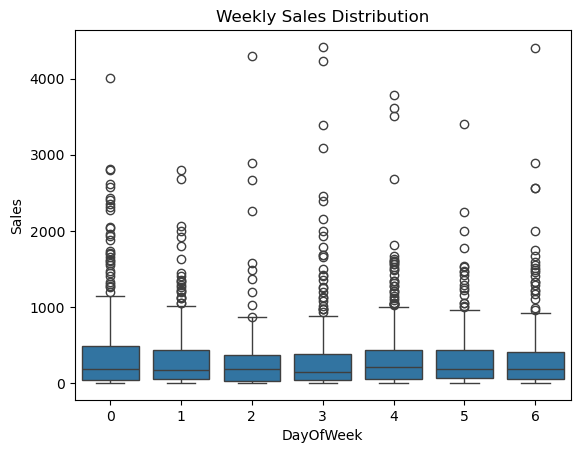

In [10]:
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Monthly Sales Distribution')
plt.show()

sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Weekly Sales Distribution')
plt.show()

The Monthly Sales Distribution shows that sales are significantly higher and more volatile in the later months of the year, particularly from October 
to December (10-12).

The Weekly Sales Distribution is remarkably consistent across all seven days, showing no significant difference in typical sales value or variability from day to day, despite frequent high-value outliers occurring uniformly throughout the week.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     2121 non-null   datetime64[ns]
 1   Ship Date      2121 non-null   datetime64[ns]
 2   Ship Mode      2121 non-null   object        
 3   Segment        2121 non-null   object        
 4   Country        2121 non-null   object        
 5   City           2121 non-null   object        
 6   State          2121 non-null   object        
 7   Region         2121 non-null   object        
 8   Category       2121 non-null   object        
 9   Sub-Category   2121 non-null   object        
 10  Product Name   2121 non-null   object        
 11  Sales          2121 non-null   float64       
 12  Quantity       2121 non-null   int64         
 13  Discount       2121 non-null   float64       
 14  Profit         2121 non-null   float64       
 15  Shipping_Days  2121 n

In [14]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'City', 
            'Category', 'Sub-Category']

le = LabelEncoder()


for col in cat_cols:
    df[col] = le.fit_transform(df[col])


print(df[cat_cols].head())


   Ship Mode  Segment  State  Region  City  Category  Sub-Category
0          2        0     15       2   137         0             0
1          2        0     15       2   137         0             1
2          3        0      8       2   108         0             3
3          3        0      3       3   184         0             2
4          3        0      3       3   184         0             3


In [15]:
df['Year'] = df['Order Date'].dt.year
df['Week'] = df['Order Date'].dt.isocalendar().week
df['Day'] = df['Order Date'].dt.day
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [16]:
df['Year'].unique()

array([2016, 2015, 2014, 2017], dtype=int32)

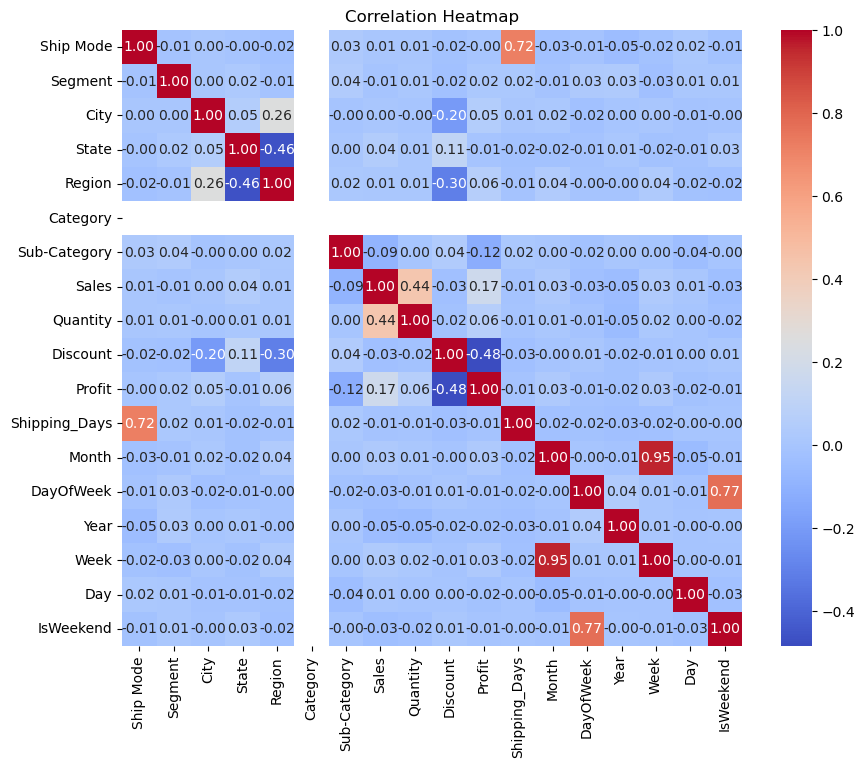

In [17]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.drop(columns=[
    'DayOfWeek', 
    'Day', 
    'Year', 
    'Segment', 
    'Region', 
    'IsWeekend', 
    'Ship Mode', 
    'State',
    'Product Name'
], inplace=True)

In [19]:
df = df.sort_values('Order Date')
train = df[df['Order Date'] < '2016-12-31']
test = df[df['Order Date'] >= '2016-12-31']

Random Forest Algorithm

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [22]:
X = df.drop(columns=['Sales','Order Date','Ship Date','Country'])
y = df['Sales']

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestRegressor(n_estimators=300, random_state=0)

In [49]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [50]:
y_pred=model.predict(X_valid)
y_pred

array([ 247.65671   ,  263.059318  , 1131.15078333,  665.03584667,
         31.97961333,  190.88744667,  108.58308133,  180.52455333,
        259.4337    ,   14.67418   ,  570.0692    ,   26.14506   ,
        216.08152   ,   25.62406667,  538.792836  ,  132.10055   ,
         40.98316667,  750.81531667,  268.6172    ,   18.4706    ,
        339.25125667,  150.26028   ,  274.61735333,  110.36378667,
        105.71386   , 1589.23850667,   43.72576667,   15.27919333,
        435.99332267,   16.64776667,  244.17967   ,   37.43811333,
        214.69841167,  549.84853   ,  864.55677   ,    4.5346    ,
          6.64808667,  333.05095333,  222.522941  ,   79.53548667,
         35.55659333, 2499.11829667,   53.32286667,  288.789002  ,
         88.23472667,  113.76856667,  571.79824533,   31.48902   ,
        302.62286   , 1963.25010667,  741.71997667,   12.5108    ,
        472.42504933,  194.286514  ,   14.61285333,  508.89448133,
        272.10528833,  643.38773333,  224.05351867,  252.71748

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error: 117.0866
Mean Squared Error: 51611.5458
Root Mean Squared Error: 227.1817
R² Score: 0.7399


XG Boost

In [60]:
from xgboost import XGBRegressor

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)

# Predictions
y_pred = xgb_regressor.predict(X_test)
y_pred

array([ 1.39642517e+02,  2.09249924e+02,  1.32891101e+03,  7.61524597e+02,
        1.23399334e+01,  1.52067566e+02,  1.68631241e+02,  2.09794586e+02,
        1.67031662e+02,  1.41635303e+01,  6.67842285e+02,  3.25755310e+01,
        2.26557388e+02,  2.69517975e+01,  4.22547729e+02,  1.30174469e+02,
        4.16282463e+01,  8.67054871e+02,  3.35433655e+02, -2.33472013e+00,
        2.75716003e+02, -7.55401850e+00,  2.36507309e+02,  1.17068871e+02,
        1.27155746e+02,  1.07545398e+03,  5.40781212e+01, -4.35560417e+01,
        3.48047729e+02,  3.06399097e+01,  3.23498779e+02,  6.54102936e+01,
        2.67075562e+02,  6.07291016e+02,  6.82707825e+02,  3.45822105e+01,
        1.72734833e+01,  4.06670959e+02,  2.07773361e+02,  7.74382706e+01,
       -2.25138912e+01,  2.63675293e+03,  8.25109253e+01,  2.24668945e+02,
        9.04270554e+01,  1.48344788e+02,  1.95470062e+02,  1.77898026e+02,
        2.63155670e+02,  2.00800830e+03,  8.57451111e+02,  3.48025970e+01,
        3.73428711e+02,  

In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 126.2862
Mean Squared Error: 57627.0090
Root Mean Squared Error: 240.0563
R² Score: 0.7096


The Random Forest Regressor outperformed XGBoost, achieving an R² of 0.739 versus 0.700, indicating better accuracy in predicting sales.